<a href="https://colab.research.google.com/github/motahari64/MedBot---Medical-Chatbot/blob/main/box_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/Kasra/Project/easy_ocr.py .

In [ ]:
import easy_ocr

In [ ]:
!pip install -q Pillow PyMuPDF

In [ ]:
from PIL import Image, ImageDraw, ImageFilter
import fitz
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [ ]:
def detect_horizontal_lines(img_binary, horizontal_line_min_width):
  # kernel to detect horizontal lines
  kernal_h = np.ones((1,horizontal_line_min_width), np.uint8)

  # horizontal kernel on the image
  img_bin_h = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, kernal_h)

  return img_bin_h

In [ ]:
def detect_vertical_lines(img_binary, vertical_line_min_width):
  # kernel to detect horizontal lines
  kernal_v = np.ones((vertical_line_min_width,1), np.uint8)

  # horizontal kernel on the image
  img_bin_v = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, kernal_v)

  return img_bin_v

In [ ]:
def detect_lines(img_binary, horizontal_line_min_width, vertical_line_min_width):
  # kernel to detect horizontal lines
  kernal_h = np.ones((1,horizontal_line_min_width), np.uint8)

  # kernel to detect vertical lines
  kernal_v = np.ones((vertical_line_min_width,1), np.uint8)

  # horizontal kernel on the image
  img_bin_h = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, kernal_h)

  # verical kernel on the image
  img_bin_v = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, kernal_v)


  # combining the image

  img_bin_final=img_bin_h|img_bin_v
  return img_bin_final

In [ ]:
test = Image.open(img_path)

NameError: name 'img_path' is not defined

In [ ]:
# read image into array

#pdf_images = easy_ocr.convert_pdf_to_images("/content/drive/MyDrive/VS_nlp/VS_nlp_Sample_Docs/1040 - 6594/65942018_006261.pdf")
pdf_images = easy_ocr.convert_pdf_to_images("/content/drive/MyDrive/VS_nlp/VS_nlp_Sample_Docs/1040 - 6594/65942018_044429.pdf")

img_path = "/content/drive/MyDrive/Kasra/Project/temp img/checkbox.jpg"
pdf_images[0].save(img_path,format='png')
image_array = cv2.imread(img_path)

box_mask = np.zeros(image_array.shape[:-1])

In [ ]:
_,ocr_results = easy_ocr.detect_img(Image.open(img_path))
text_bboxes = easy_ocr.get_bboxes(ocr_results)

In [ ]:
ocr_results[2][0]

[[193, 35], [511, 35], [511, 53], [193, 53]]

In [ ]:
text_bboxes[1]

[(44, 24), (176, 24), (176, 74), (44, 74)]

In [ ]:
for i in range(len(text_bboxes)):
  bbox = text_bboxes[i]
  text_bboxes[i] = [(x,y) for x,y in bbox]

In [ ]:
image_array_copy = image_array.copy()

In [ ]:
# convering image to gray scale
gray_scale_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

# image thresholding

_, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

img_bin = 255 - img_bin

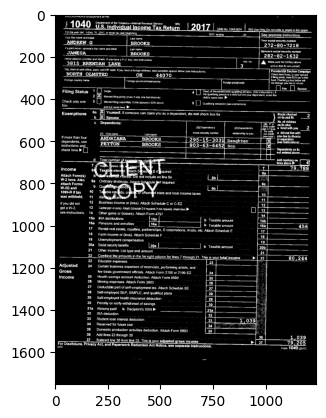

In [ ]:
plt.imshow(img_bin,cmap="gray")

In [ ]:
# Create a blank mask image
mask = np.ones_like(img_bin) * 255


# Iterate over positions
for position in text_bboxes:
    # Extract rectangle coordinates
    x1, y1 = position[0]
    x2, y2 = position[2]

    # Fill rectangle with black in the mask image
    mask[int(y1):int(y2), int(x1):int(x2)] = 0

# Apply the mask on the grayscale image
img_bin = cv2.bitwise_and(img_bin, mask)



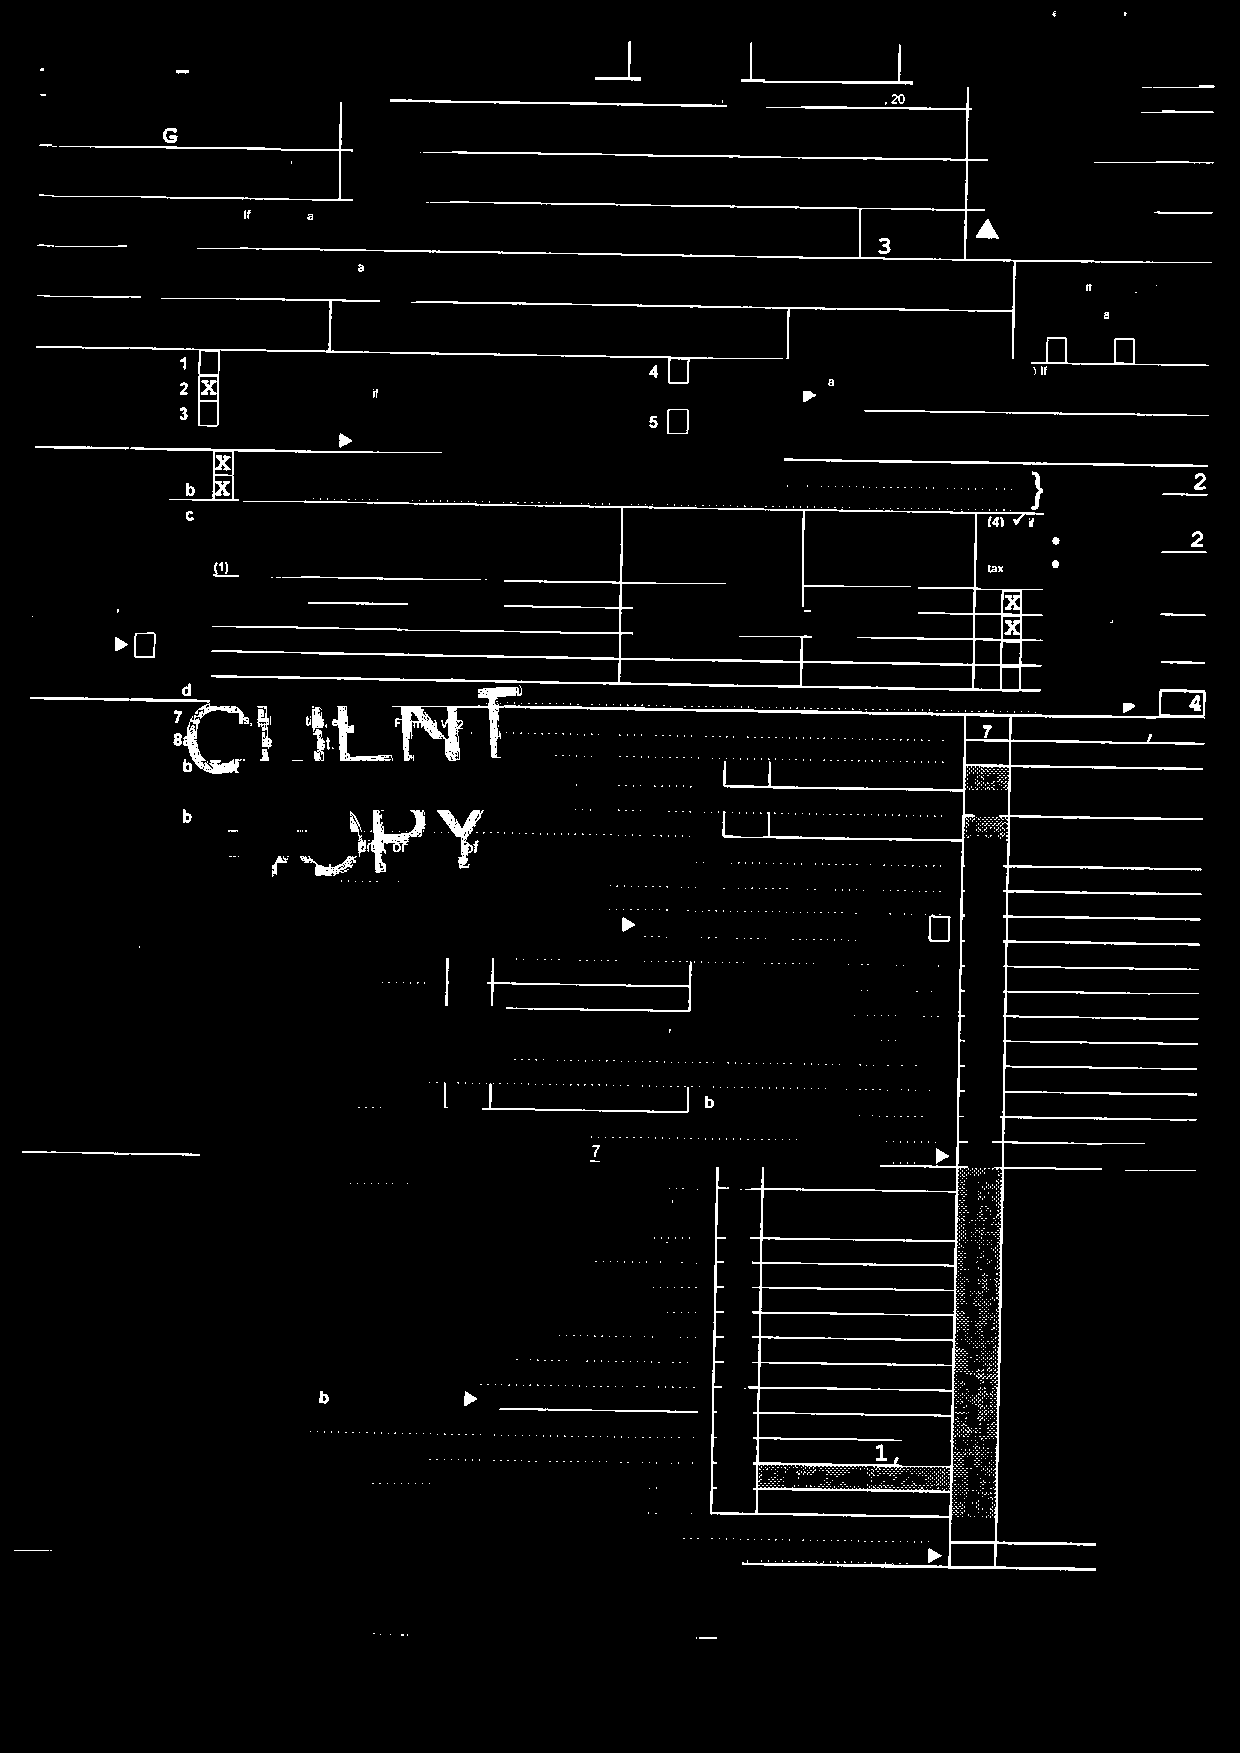

In [ ]:
Image.fromarray(img_bin)

In [ ]:
for i in range(img_bin.shape[1]):
  flag = False
  col = img_bin[:, i]
  for j in range(len(col)-1):
    if col[j]!=0 and col[j+1]==0:
      flag=True
      print(i,j)
      break
  if(flag):
    break



14 1550


In [ ]:
for i in range(img_bin.shape[1]-1,-1,-1):
  flag = False
  col = img_bin[:, i]
  for j in range(1,len(col)):
    if col[j]!=0 and col[j-1]==0:
      flag=True
      print(i,j)
      break
  if(flag):
    break

1214 86


In [ ]:
import math
x = (1214 - 14)
y = (86 - 1550)
#t = np.arctan(/)
t = math.atan2(y,x)
print(t)
#t = int(t*180.0/np.pi)
print(t)


y2 = image_array_copy.shape[0]
x2 = image_array_copy.shape[1]
t2 = math.atan2(y2,x2)
print(t2)
#t2 = int(t2*180.0/np.pi)
print(t2)

-0.884174755465111
-0.884174755465111
0.9551486165688209
0.9551486165688209


In [ ]:
#Image.fromarray(img_bin).rotate(int(t2-t), expand=True)


In [ ]:
Image.fromarray(img_bin).rotate(int(t2-t), expand=True).save("/content/drive/MyDrive/Kasra/Project/hi.png","png")
img_bin2 = cv2.imread("/content/drive/MyDrive/Kasra/Project/hi.png")
img_bin2 = cv2.cvtColor(img_bin2, cv2.COLOR_BGR2GRAY)

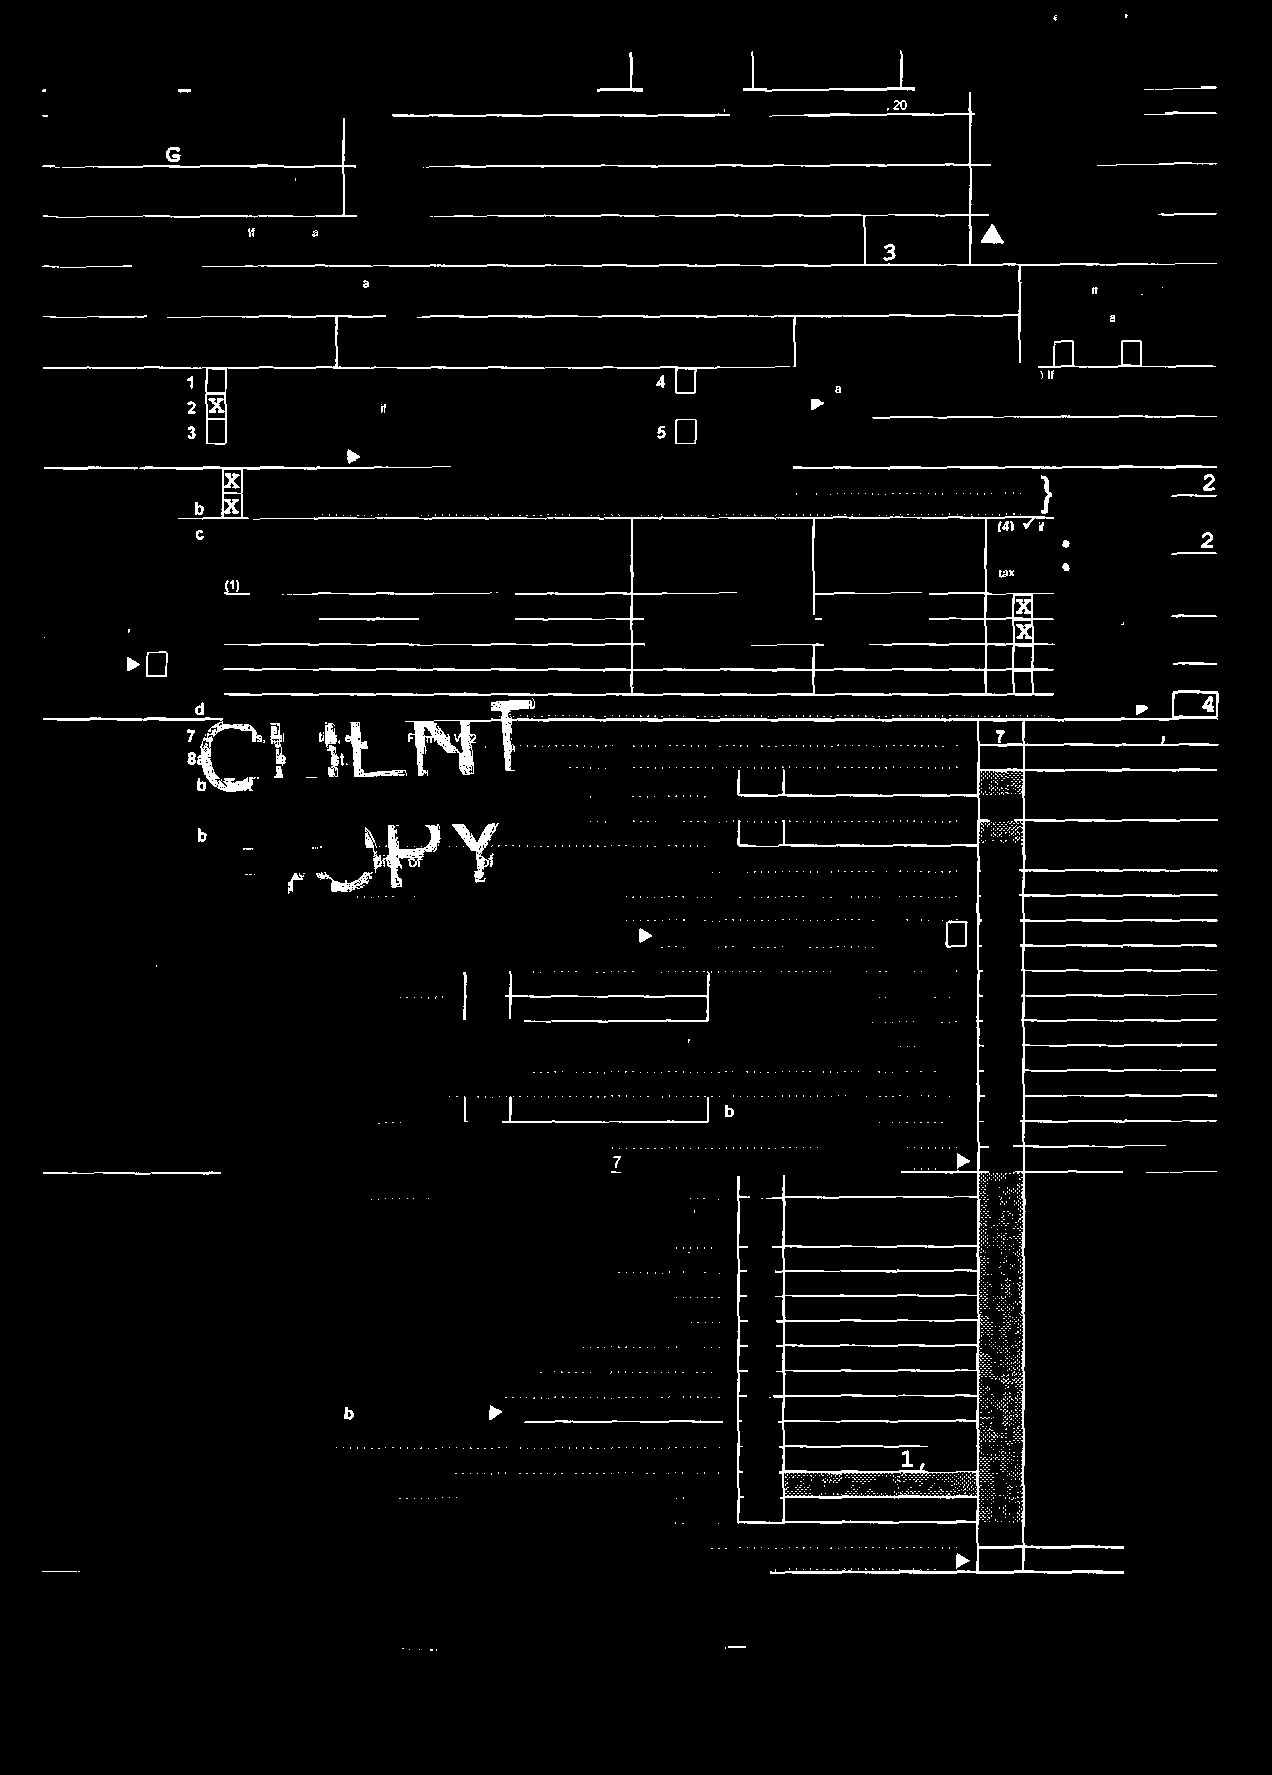

In [ ]:
Image.fromarray(img_bin2)

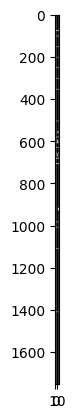

In [ ]:
test_img = detect_horizontal_lines(img_bin, 3)
height,width = test_img.shape

start_point = (width // 2 + 100, 0)  # Top-middle point
end_point = (width // 2 + 5, height)  # Bottom-middle point
test_img = cv2.line(test_img, start_point, end_point, 255, 1)

start_point = (width // 2 - 100, 0)  # Top-middle point
end_point = (width // 2 - 5, height)  # Bottom-middle point
test_img = cv2.line(test_img, start_point, end_point, 255, 1)

test_img = test_img[:,width // 2 - 10:width // 2 + 10]
#test_img = cv2.cvtColor(test_img, cv2.COLOR_GRAY2BGR)

#test_img[:,]
#plt.imshow(test_img,cmap="gray")
plt.imshow(test_img,cmap="gray")

In [ ]:
# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(test_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
contours

In [ ]:
max_x = arr_test[0][0][0] - 1
max_y = arr_test[0][0][1] - 1
min_x = arr_test[0][0][0] + 1
min_y = arr_test[0][0][1] + 1
print((min_x,min_y),(max_x,max_y))

for e in arr_test:
  p = e[0]
  print(p)
  if max_x < p[0]:
    max_x = p[0]
  if max_y < p[1]:
    max_y = p[1]

  if min_x > p[0]:
    min_x = p[0]
  if min_y > p[1]:
    min_y = p[1]

print((min_x,min_y),(max_x,max_y))

(6, 206) (4, 204)
[5, 205]
[6, 204]
[9, 204]
[10, 205]
[14, 205]
[15, 206]
[15, 253]
[14, 254]
[12, 254]
[11, 253]
[6, 253]
[5, 252]
(5, 204) (15, 254)


In [ ]:
import math
y = (max_x - min_x)
x = (max_y - min_y)
#t = np.arctan(/)
t = math.atan2(x,y)
print(t)
#t = int(t*180.0/np.pi)
print(t)

1.373400766945016
1.373400766945016


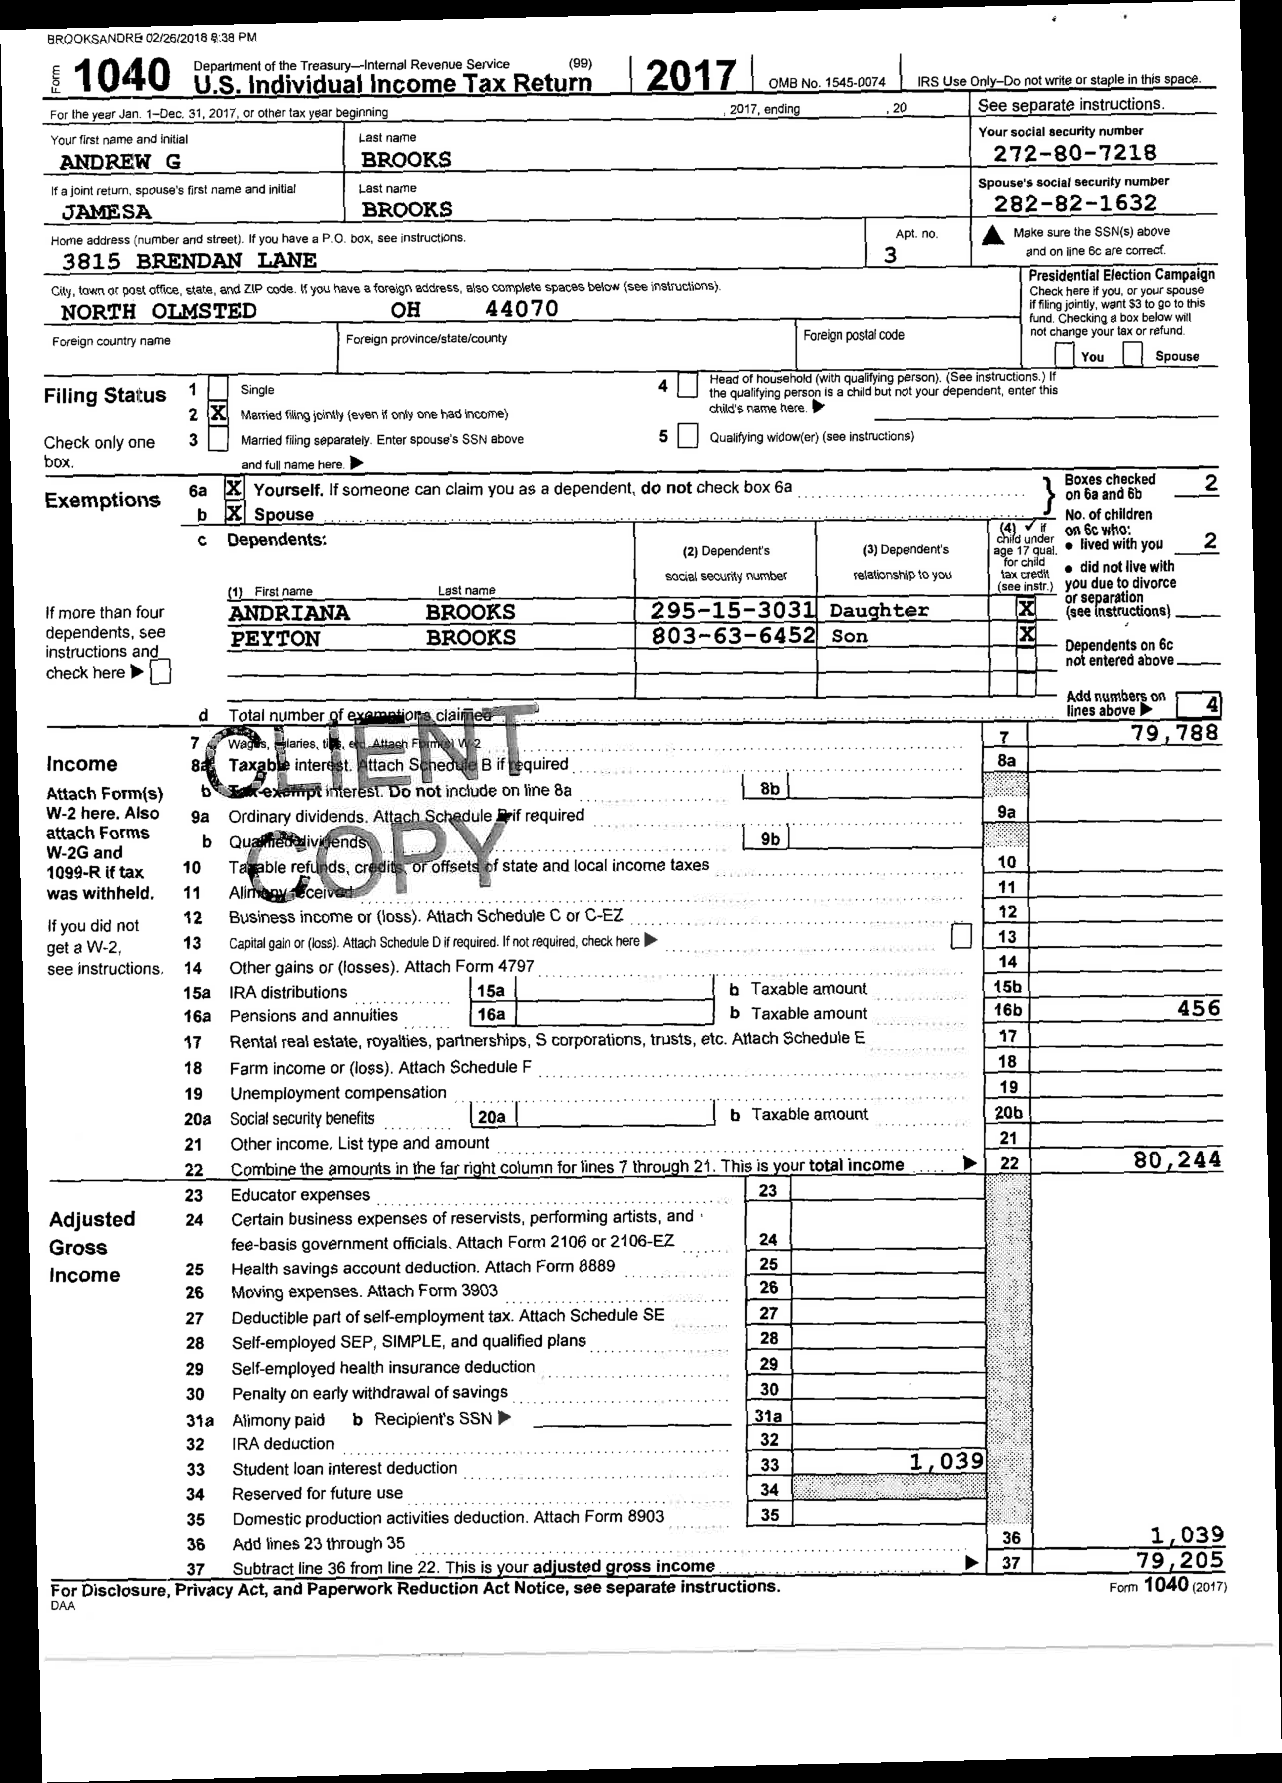

In [ ]:
Image.fromarray(img_).rotate(t, expand=True)


In [ ]:
def extract_horizontal():
  img_long_horizontal_lines = detect_horizontal_lines(img_bin,10)


  pil_horizontal_img = Image.fromarray(img_long_horizontal_lines)
  # pil_horizontal_img = pil_horizontal_img.filter(ImageFilter.BLUR)
  pil_horizontal_img = pil_horizontal_img.filter(ImageFilter.GaussianBlur(1))
  horizontal_img_gray = np.array(pil_horizontal_img)
  #horizontal_img_gray = cv2.cvtColor(np.array(pil_horizontal_img), cv2.COLOR_BGR2GRAY)
  _, horizontal_img_bin = cv2.threshold(horizontal_img_gray, 10, 255, cv2.THRESH_BINARY)
  t = cv2.cvtColor(horizontal_img_bin, cv2.COLOR_GRAY2RGB)
  longest_horizontal_array = detect_horizontal_lines(t, 20)
  longest_horizontal_array = cv2.cvtColor(longest_horizontal_array, cv2.COLOR_RGB2GRAY)
  plt.imshow(longest_horizontal_array)
  return Image.fromarray(longest_horizontal_array)


  sum_rows = np.sum(longest_horizontal_array,axis=1)
  test = scipy.signal.find_peaks(sum_rows, distance=5)

  longest_horizontal_array_rgb = cv2.cvtColor(longest_horizontal_array, cv2.COLOR_GRAY2RGB)

  for index in test[0]:
    row = longest_horizontal_array_rgb[index,:,:]
    for i in range(row.shape[0]):
      #print(row[i])
      if (row[i] - 0).all():
        row[i] = [255,0,0]
        for j in range(1):
          try:
            box_mask[index+j,i] = 1
            box_mask[index-j,i] = 1
          except:
            break
      else:
        row[i] = image_array_copy[index,i,:]

    #image_array_copy[index] = row

In [ ]:
def extract_vertical():
  img_long_vertical_lines = detect_vertical_lines(img_bin,10)


  pil_vertical_img = Image.fromarray(img_long_vertical_lines)
  # pil_vertical_img = pil_vertical_img.filter(ImageFilter.BLUR)
  pil_vertical_img = pil_vertical_img.filter(ImageFilter.GaussianBlur(1))
  vertical_img_gray = np.array(pil_vertical_img)
  #vertical_img_gray = cv2.cvtColor(np.array(pil_vertical_img), cv2.COLOR_BGR2GRAY)
  _, vertical_img_bin = cv2.threshold(vertical_img_gray, 10, 255, cv2.THRESH_BINARY)
  t = cv2.cvtColor(vertical_img_bin, cv2.COLOR_GRAY2RGB)
  longest_vertical_array = detect_vertical_lines(t, 20)
  longest_vertical_array = cv2.cvtColor(longest_vertical_array, cv2.COLOR_RGB2GRAY)
  plt.imshow(longest_vertical_array)
  Image.fromarray(longest_vertical_array)


  sum_cols = np.sum(longest_vertical_array,axis=0)
  peaks = scipy.signal.find_peaks(sum_cols, distance=5)

  longest_vertical_array_rgb = cv2.cvtColor(longest_vertical_array, cv2.COLOR_GRAY2RGB)

  for index in peaks[0]:
    col = longest_vertical_array_rgb[:,index,:]
    for i in range(col.shape[0]):
      #print(col[i])
      if (col[i] - 0).all():
        col[i] = [0,0,255]
        for j in range(1):
          try:
            box_mask[i,index+j] = 1
            box_mask[i,index-j] = 1
          except:
            break
      else:
        col[i] = image_array_copy[i,index,:]

    #image_array_copy[:,index] = col

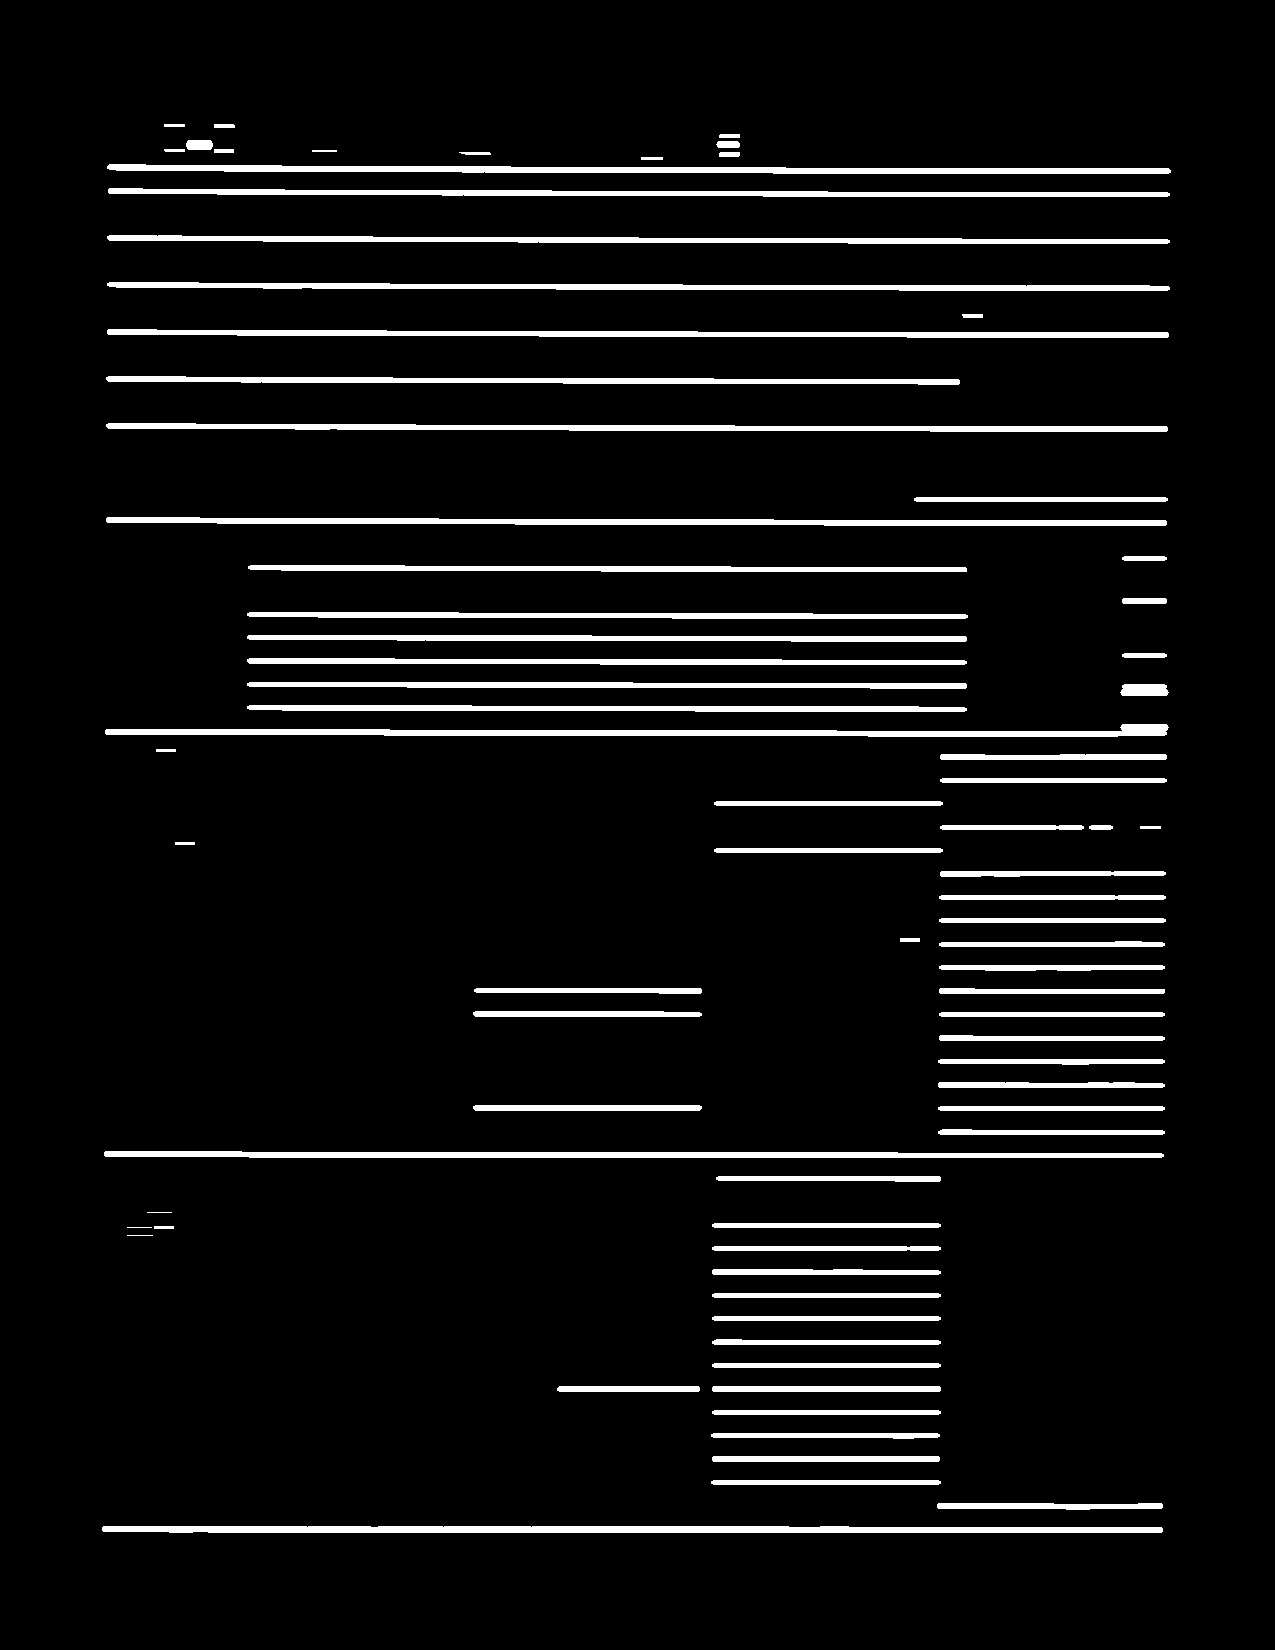

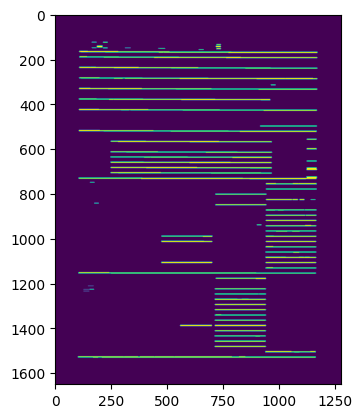

In [ ]:
extract_horizontal()

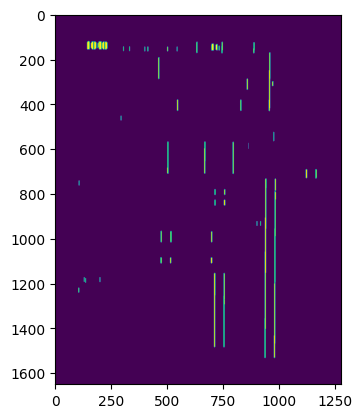

In [ ]:
extract_vertical()

In [ ]:
#binary_img_long_horizontal_lines = detect_horizontal_lines(img_bin,10)
#img_long_horizontal_lines = np.where(binary_img_long_horizontal_lines == 0, 0, img_bin)


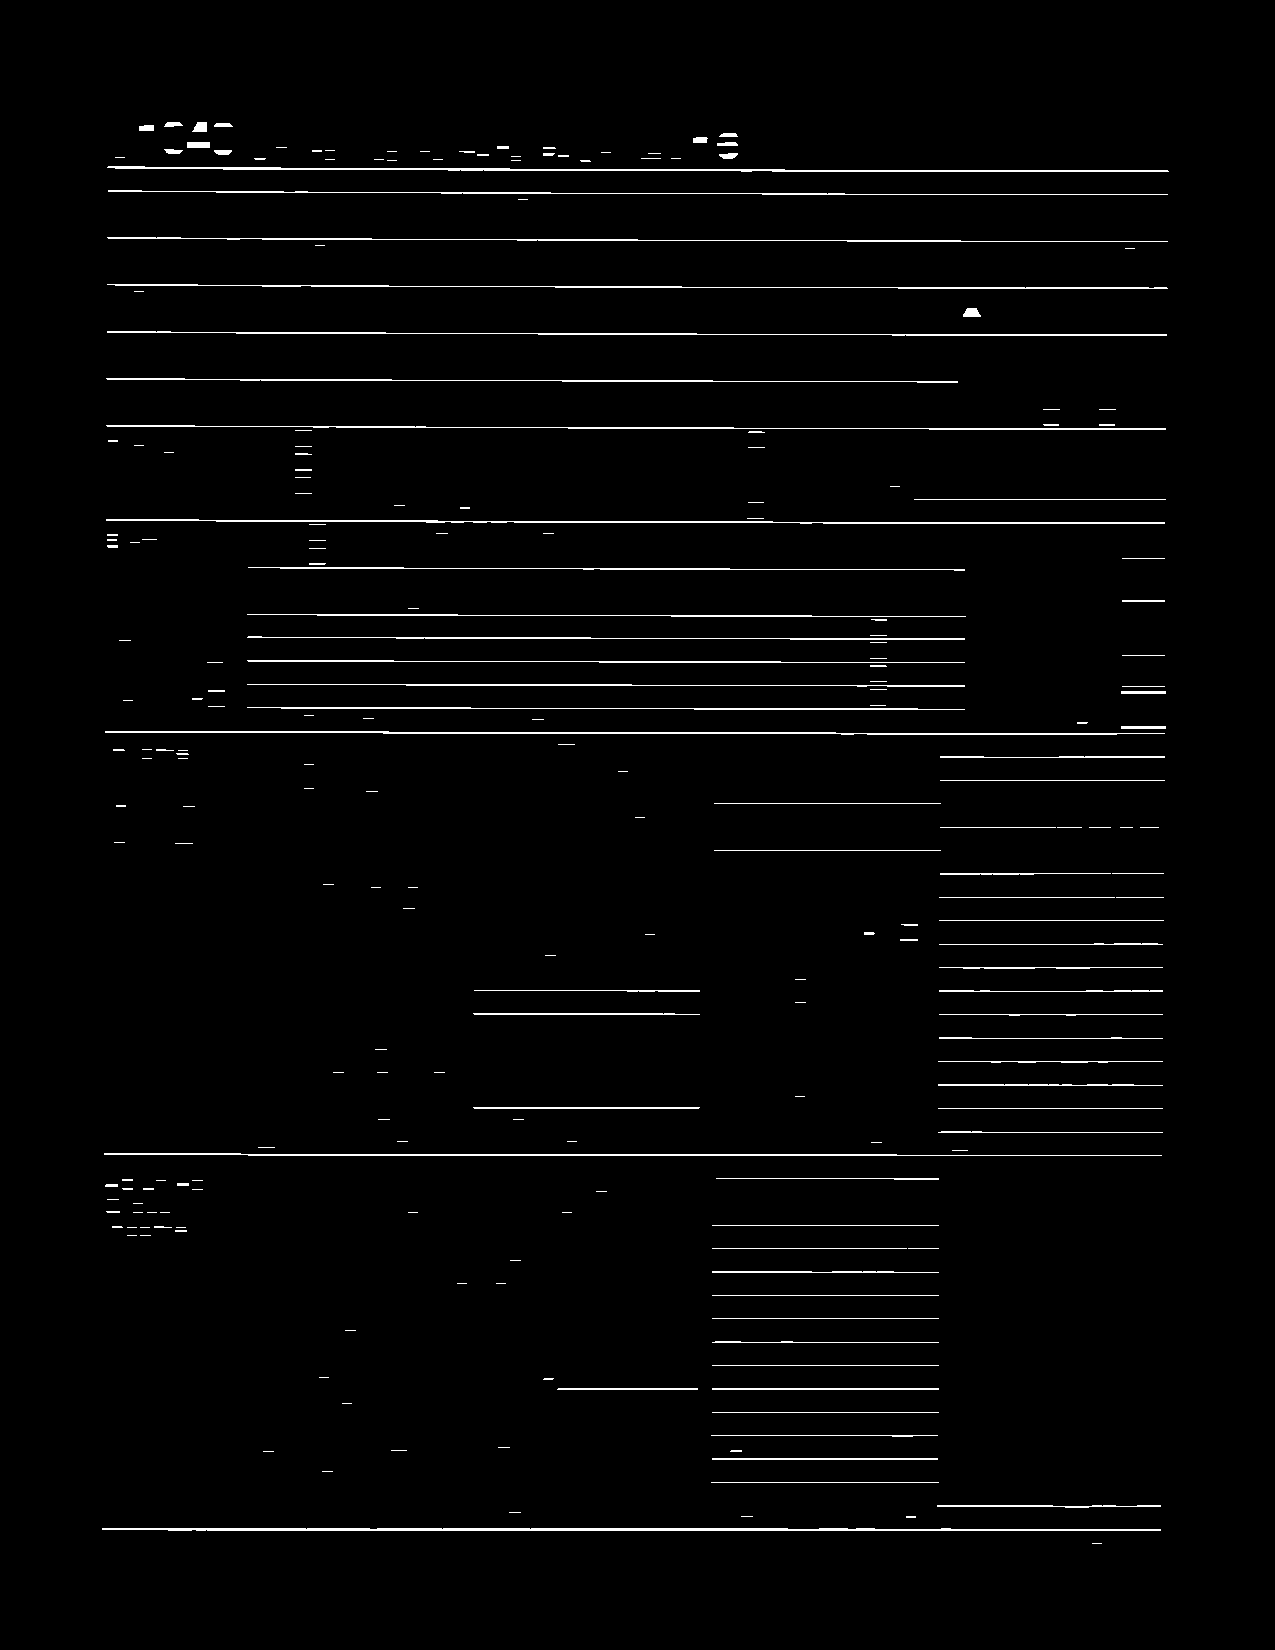

In [ ]:
Image.fromarray(img_long_horizontal_lines)

In [ ]:
#img_long_horizontal_lines = cv2.cvtColor(img_long_horizontal_lines,cv2.COLOR_GRAY2RGB)

In [ ]:
longest_horizontal_array.shape

(1650, 1275)

In [ ]:
sum_rows.shape

(1650,)

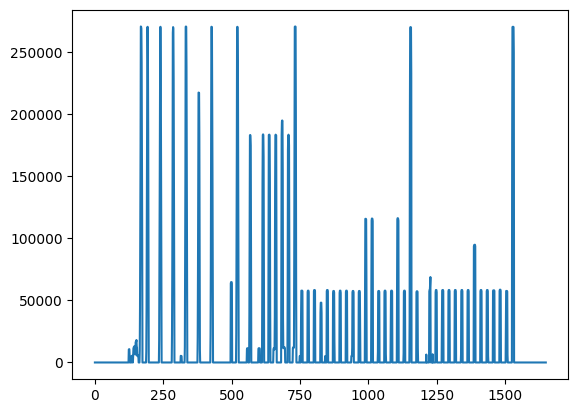

In [ ]:
plt.plot(sum_rows)

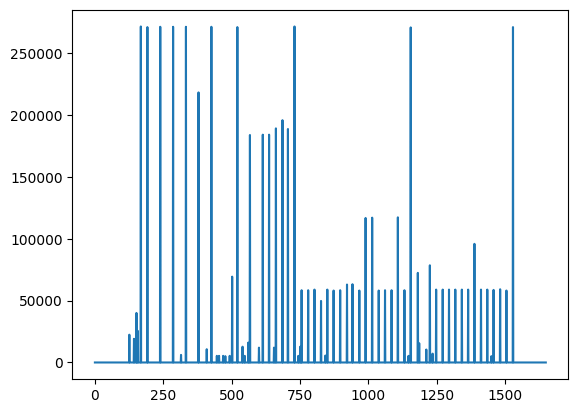

In [ ]:
plt.plot(test_array)

In [ ]:
test = scipy.signal.find_peaks(sum_rows, distance=5)
test_array = np.zeros(sum_rows.shape)
print(test)
for index in test[0]:
  test_array[index] = sum_rows[index]

(array([ 125,  136,  144,  152,  158,  168,  193,  240,  286,  314,  333,
        379,  426,  499,  521,  558,  568,  600,  615,  637,  655,  661,
        685,  692,  708,  727,  732,  750,  756,  780,  803,  827,  843,
        850,  873,  897,  920,  944,  967,  990, 1013, 1038, 1061, 1085,
       1107, 1132, 1154, 1178, 1212, 1227, 1235, 1248, 1272, 1295, 1318,
       1342, 1365, 1389, 1412, 1435, 1458, 1482, 1505, 1529]), {})


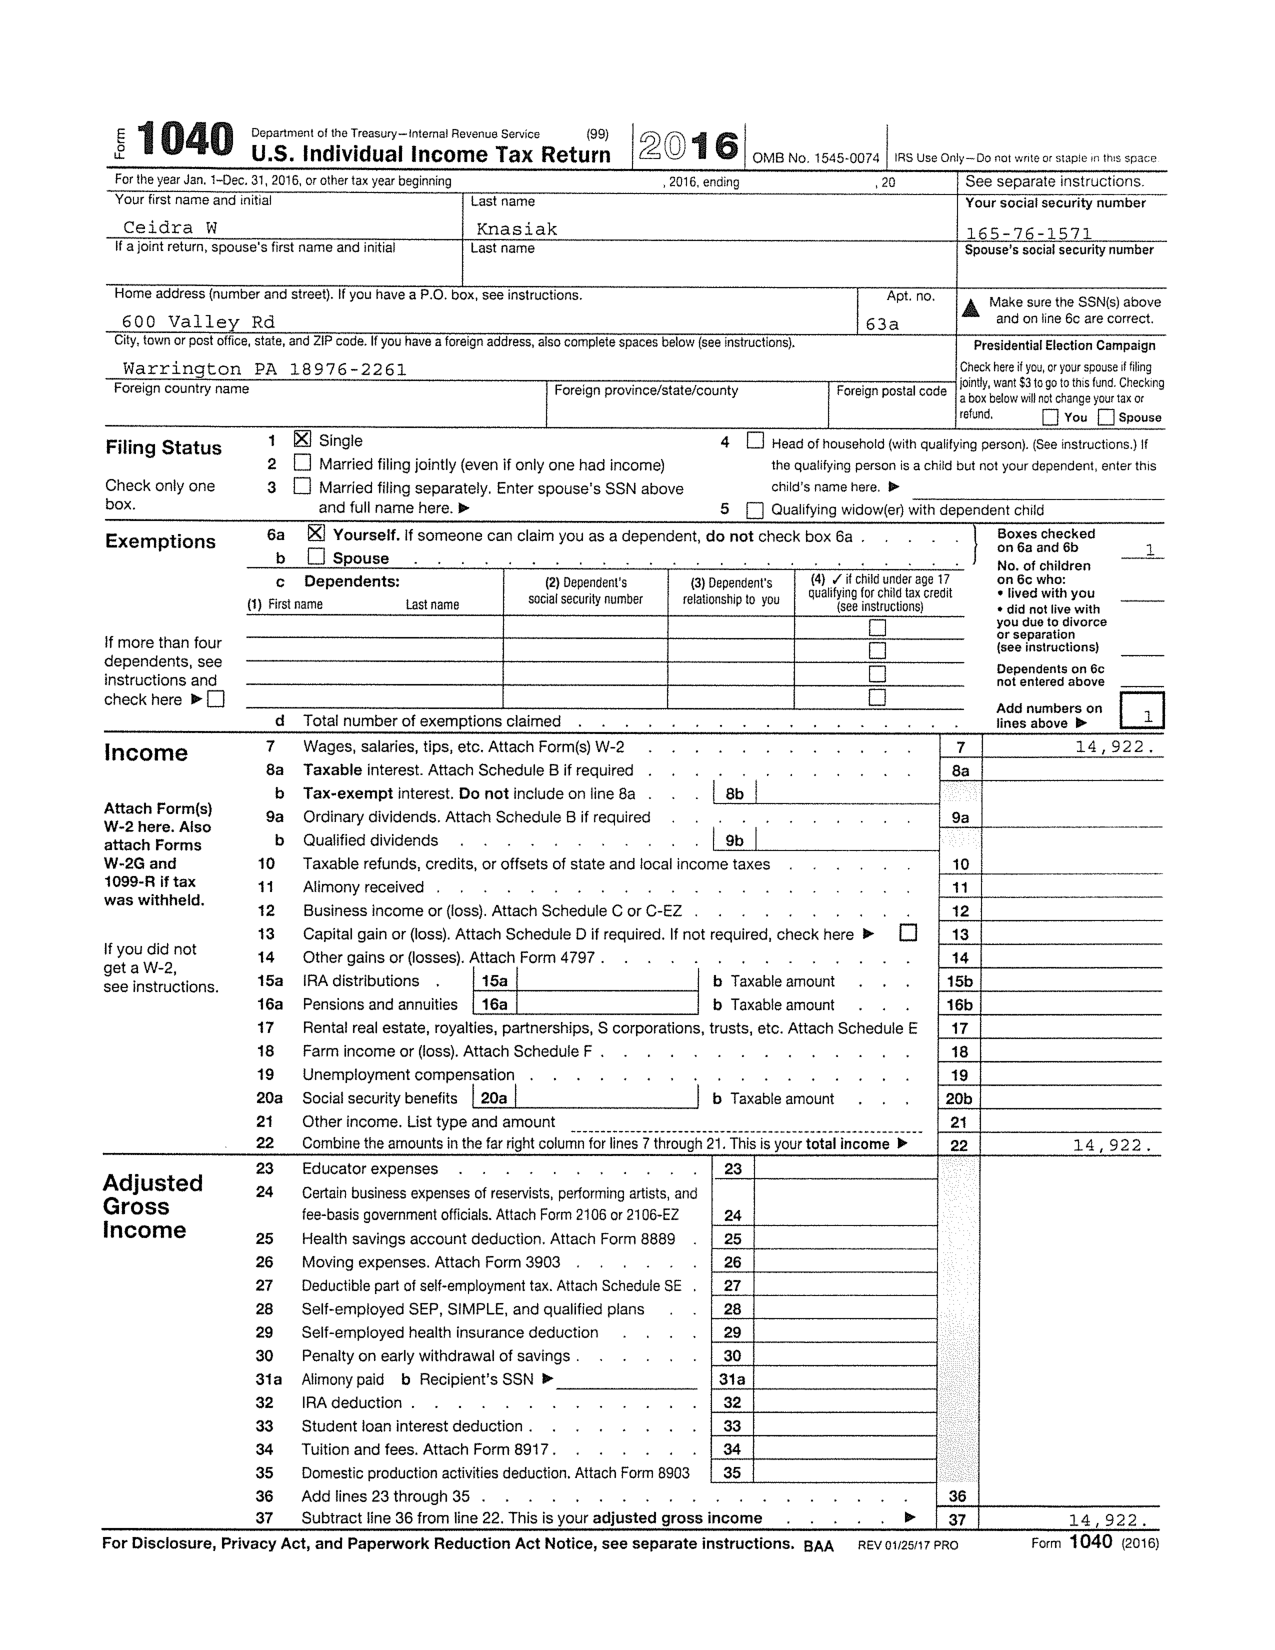

In [ ]:
Image.fromarray(image_array_copy)

In [ ]:
def find_corners(mask):
  w,h = mask.shape
  corners =[]
  for i in range(1,w-1):
    for j in range(1,h-1):
      if mask[i,j]==1:
        if mask[i,j+1]==1 or mask[i,j-1]==1 :
          if mask[i+1,j]==1 or mask[i-1,j]==1:
            corners.append((i,j))

  return corners


In [ ]:
box_mask.shape

(1650, 1275)

In [ ]:
corners = find_corners(box_mask)

In [ ]:
for c in corners:
  image_array_copy[c] = [0,255,0]

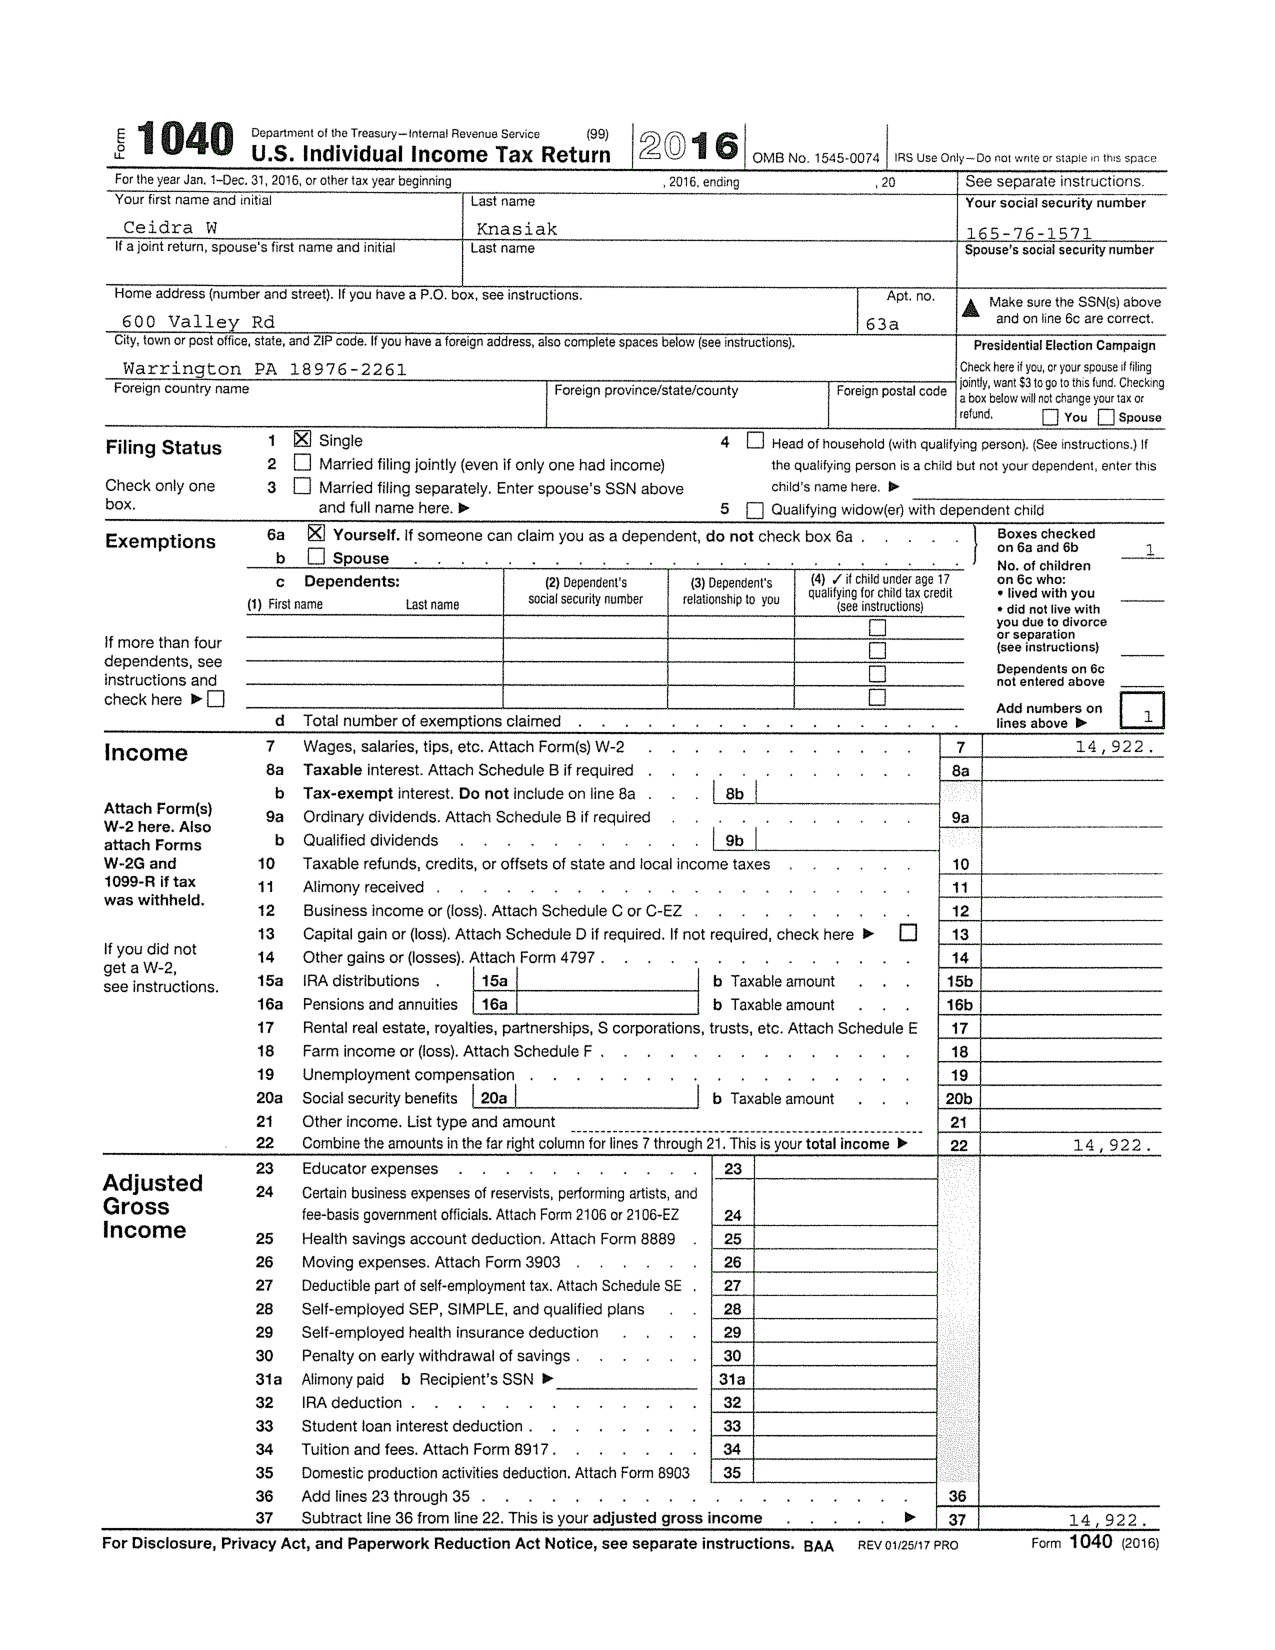

In [ ]:
Image.fromarray(image_array_copy)

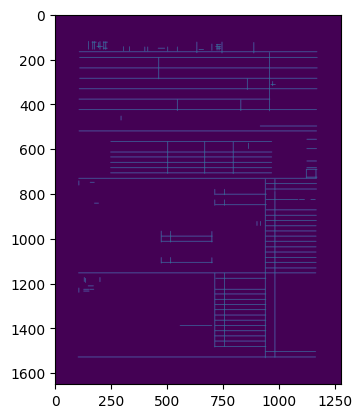

In [ ]:
plt.imshow(box_mask)

In [ ]:
corners

In [ ]:
def find_box_widths(mask,corners):
  width_posistions = []
  width_posistions.append(,(0,corners[0][0]))
  for i in range(1,len(corners)):
    if corners[i][0] == corners[i-1][0]:


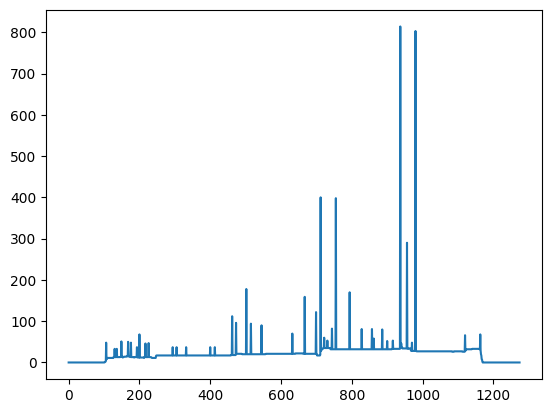

In [ ]:
plt.plot(np.sum(box_mask,axis=0))